In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
#import io
#import base64

## Data ##

In [139]:
earth_quake = pd.read_csv("C:/Users/pande/Desktop/database.csv")

In [140]:
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [141]:
earth_quake.columns

Index([u'Date', u'Time', u'Latitude', u'Longitude', u'Type', u'Depth',
       u'Depth Error', u'Depth Seismic Stations', u'Magnitude',
       u'Magnitude Type', u'Magnitude Error', u'Magnitude Seismic Stations',
       u'Azimuthal Gap', u'Horizontal Distance', u'Horizontal Error',
       u'Root Mean Square', u'ID', u'Source', u'Location Source',
       u'Magnitude Source', u'Status'],
      dtype='object')

In [142]:
earth = earth_quake[["Date","Latitude","Longitude","Type","Magnitude"]]

In [143]:
earth.head()

,Date,Latitude,Longitude,Type,Magnitude
0,01/02/1965,19.246,145.616,Earthquake,6.0
1,01/04/1965,1.863,127.352,Earthquake,5.8
2,01/05/1965,-20.579,-173.972,Earthquake,6.2
3,01/08/1965,-59.076,-23.557,Earthquake,5.8
4,01/09/1965,11.938,126.427,Earthquake,5.8


In [144]:
earth.tail()

,Date,Latitude,Longitude,Type,Magnitude
23407,12/28/2016,38.3917,-118.8941,Earthquake,5.6
23408,12/28/2016,38.3777,-118.8957,Earthquake,5.5
23409,12/28/2016,36.9179,140.4262,Earthquake,5.9
23410,12/29/2016,-9.0283,118.6639,Earthquake,6.3
23411,12/30/2016,37.3973,141.4103,Earthquake,5.5


In [181]:
earth["Date"] = pd.to_datetime(earth["Date"])

In [69]:
earth.shape

(23412, 5)

In [94]:
earth.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

## Creating a Basemap instance ##

In [160]:
m = Basemap(projection="mill")

## Mapping all affected areas ##

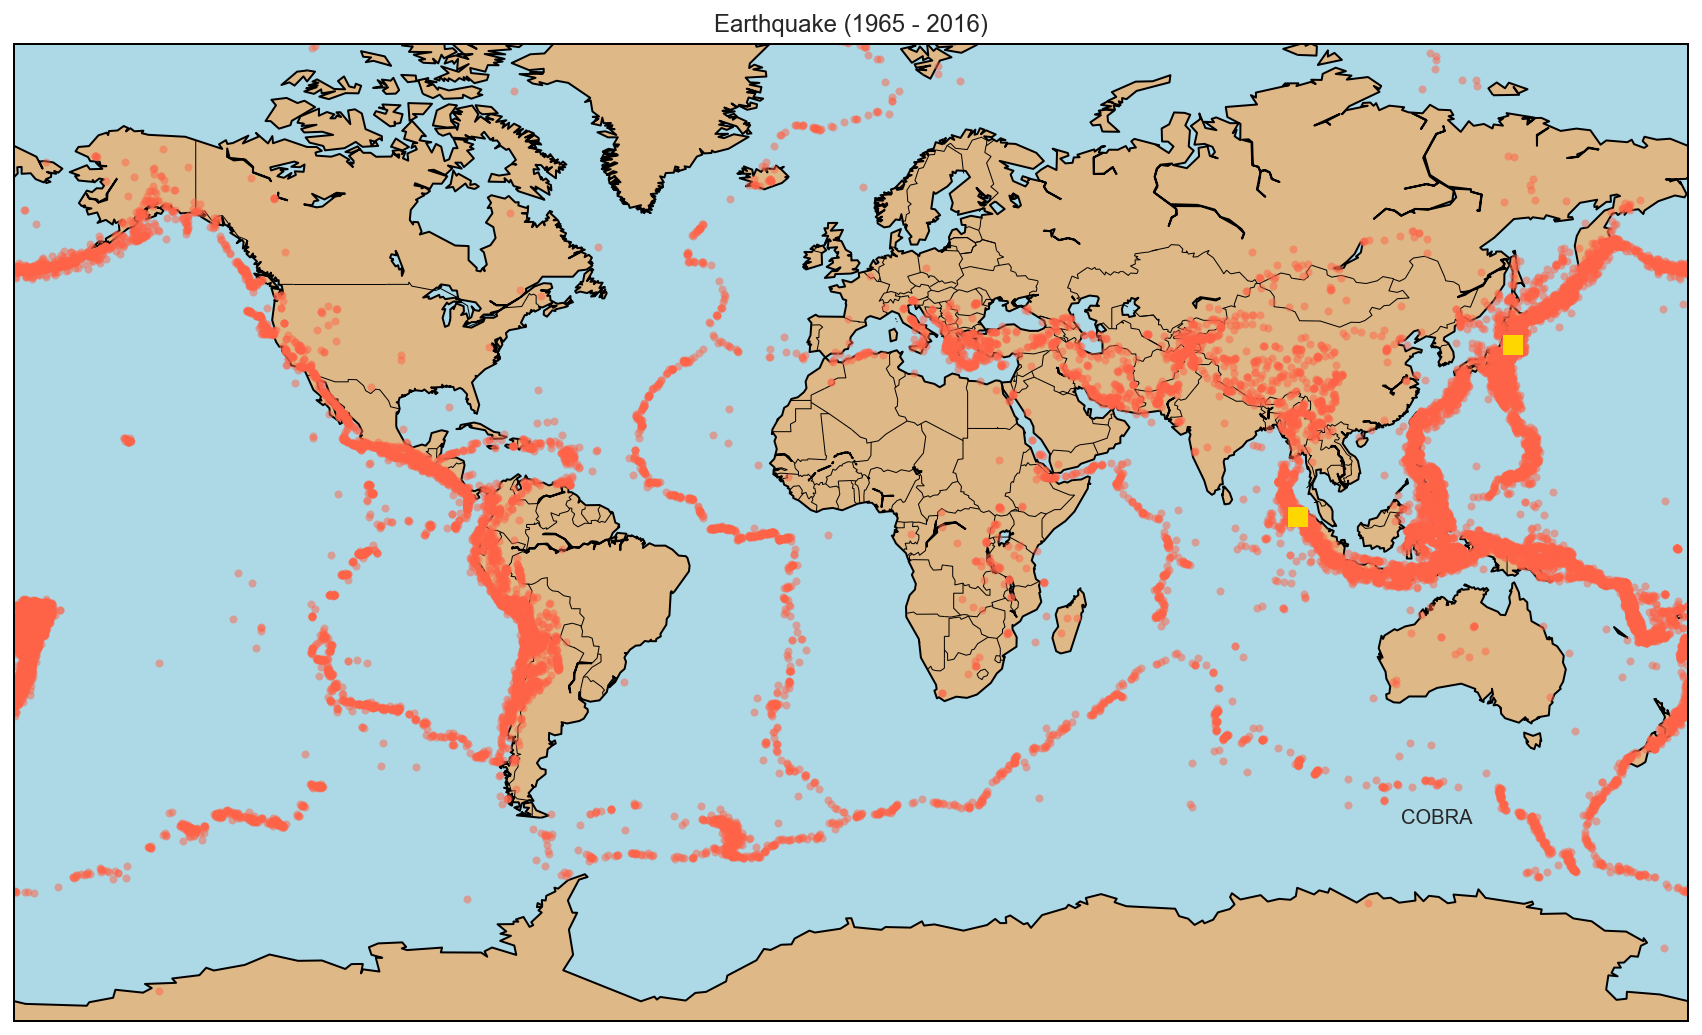

In [182]:
def creat_map(Type, size = 4):
    fig = plt.figure(figsize=(15, 10))
    fig.text(.8, .3, 'COBRA', ha='right')
    m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
    m.drawmapboundary(fill_color='lightblue')

    x, y = m(list(earth[earth.Type == Type].Longitude), list(earth[earth.Type == Type].Latitude))
    points = m.plot(x, y, "o", markersize = size, color = 'tomato', alpha = .5)
    if Type is 'Earthquake':
        a,b = m(list(earth[(earth.Type == Type) & (earth.Magnitude == earth.Magnitude.max())].Longitude), list(earth[(earth.Type == Type) & (earth.Magnitude == earth.Magnitude.max())].Latitude))
        points = m.plot(a, b, "s", markersize = 10, color = 'gold', alpha = 1)

    plt.title("{} (1965 - 2016)".format(Type))
    #plt.legend(loc ='lower left', prop= {'size':11})
    plt.show()
creat_map('Earthquake')

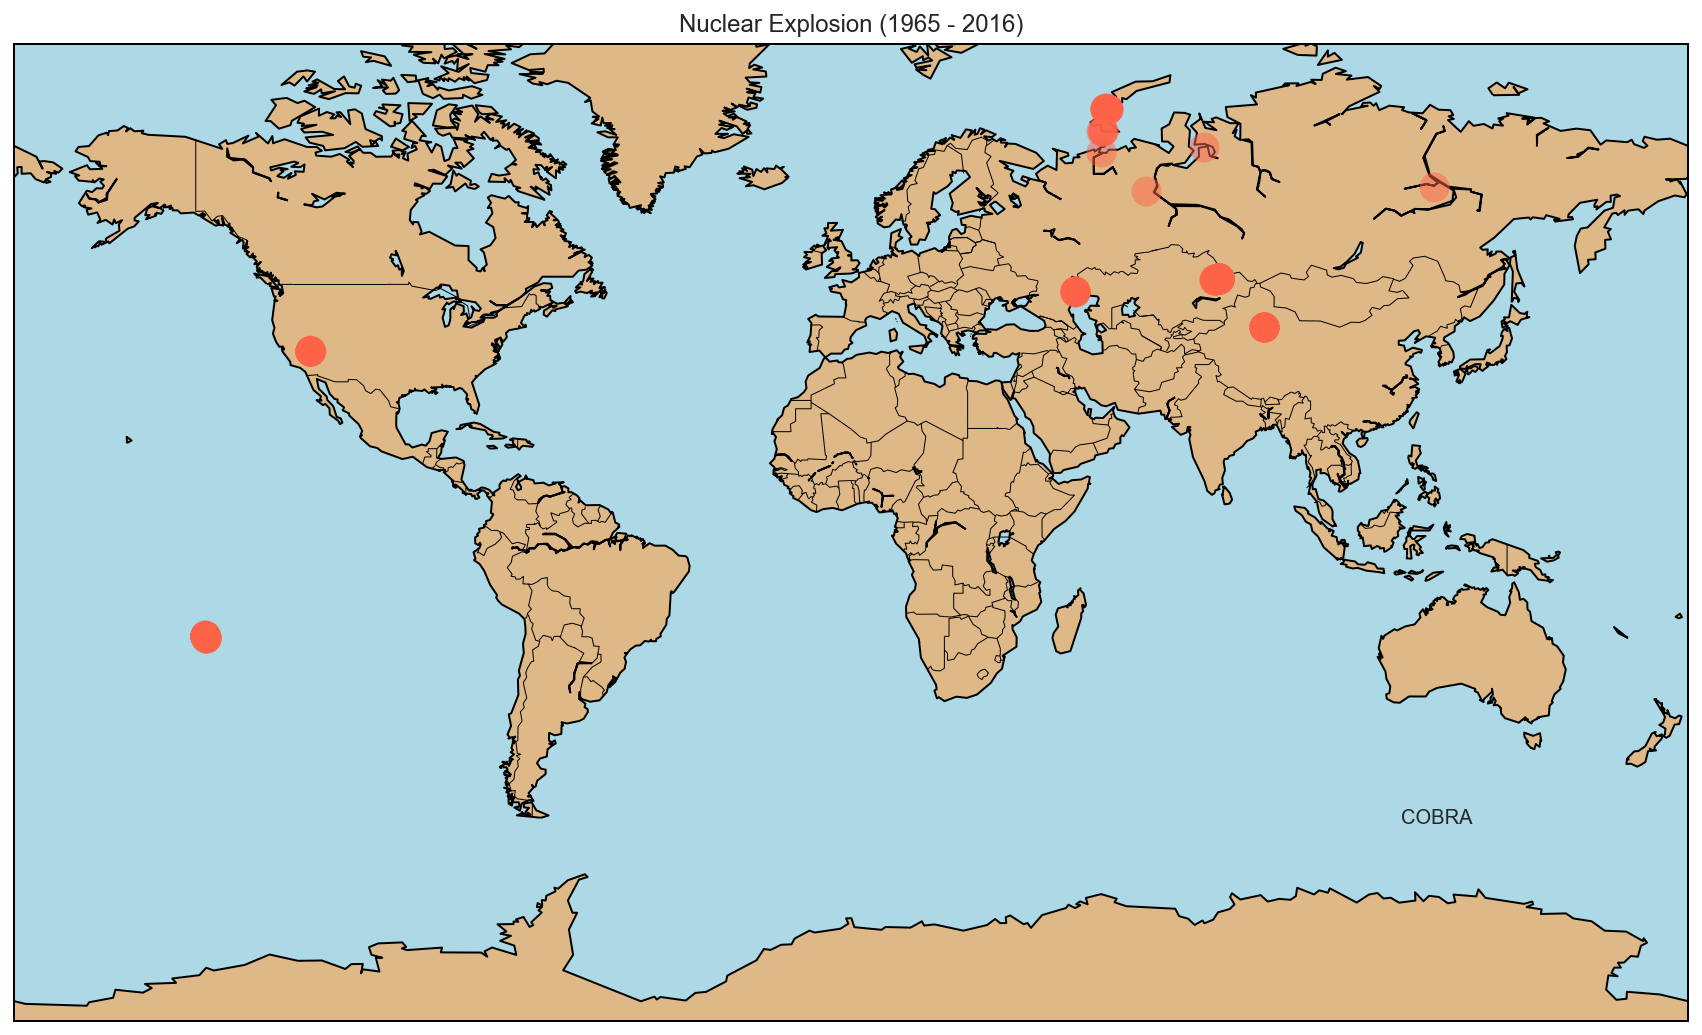

In [162]:
creat_map('Nuclear Explosion', size = 15)

In [163]:
data = pd.read_csv('C:/Users/pande/Desktop/database.csv', index_col = 0, parse_dates = True)

In [166]:
data.head()

,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Year
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


In [164]:
data = data.dropna(axis = 1)
data['Year'] = data.index.year

In [165]:
data.head()

,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Year
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


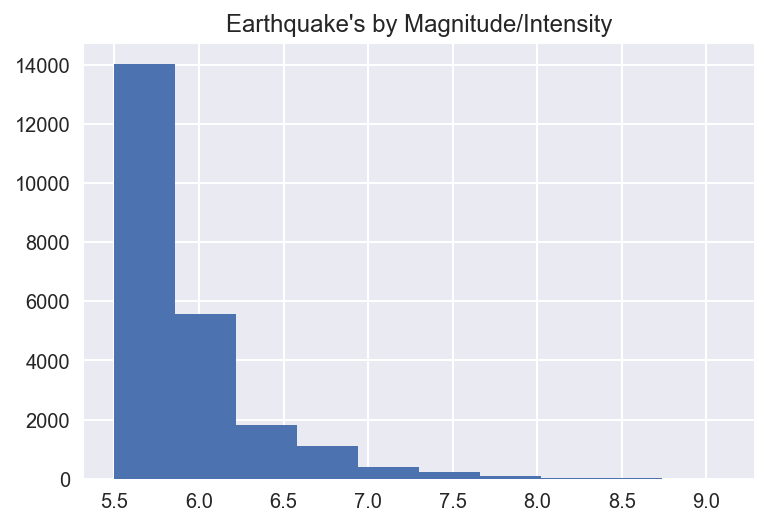

In [185]:
def hist(Type):
    fig = plt.figure(figsize=(15, 10))
    data[data.Type == Type].hist('Magnitude')
    plt.title("{}'s by Magnitude/Intensity".format(Type))
hist('Earthquake')

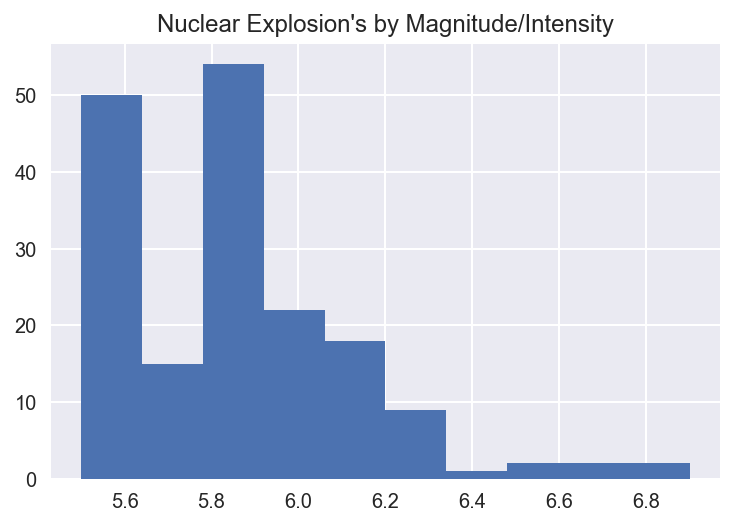

In [186]:
hist('Nuclear Explosion')

In [169]:
def by_year(Type, graph_type):
    fig=plt.figure(figsize=(15, 10))
    data["Year"][data.Type == Type].value_counts().sort_index().plot(kind = graph_type)
    plt.title('{} Count by Year'.format(Type))

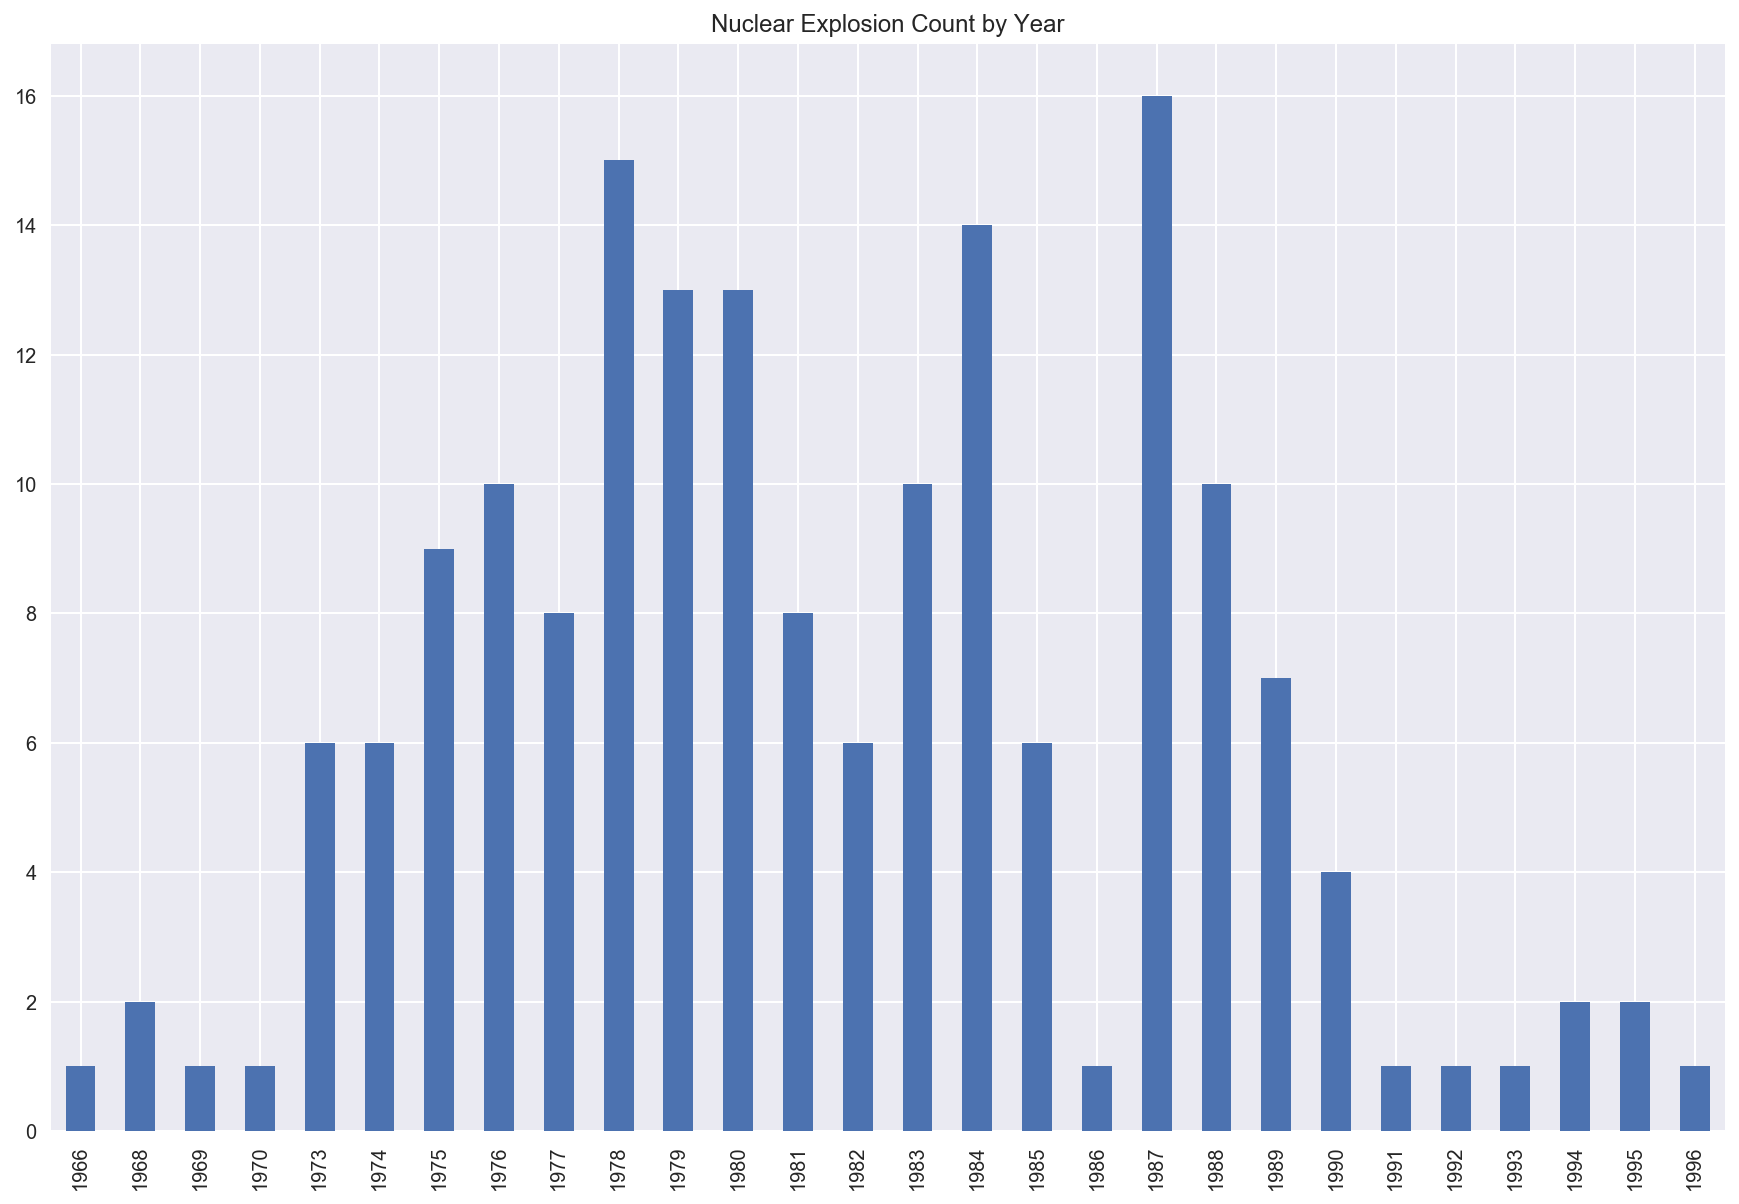

In [170]:
by_year('Nuclear Explosion', graph_type = 'bar')

## The Severity of an Earthquake ##

### Minimum and Maximum Magnitude ###

In [171]:
minimum = earth["Magnitude"].min()
maximum = earth["Magnitude"].max()
average = earth["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",round(maximum,2))
print("Mean",round(average,2))

('Minimum:', 5.5)
('Maximum:', 9.1)
('Mean', 5.88)


Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


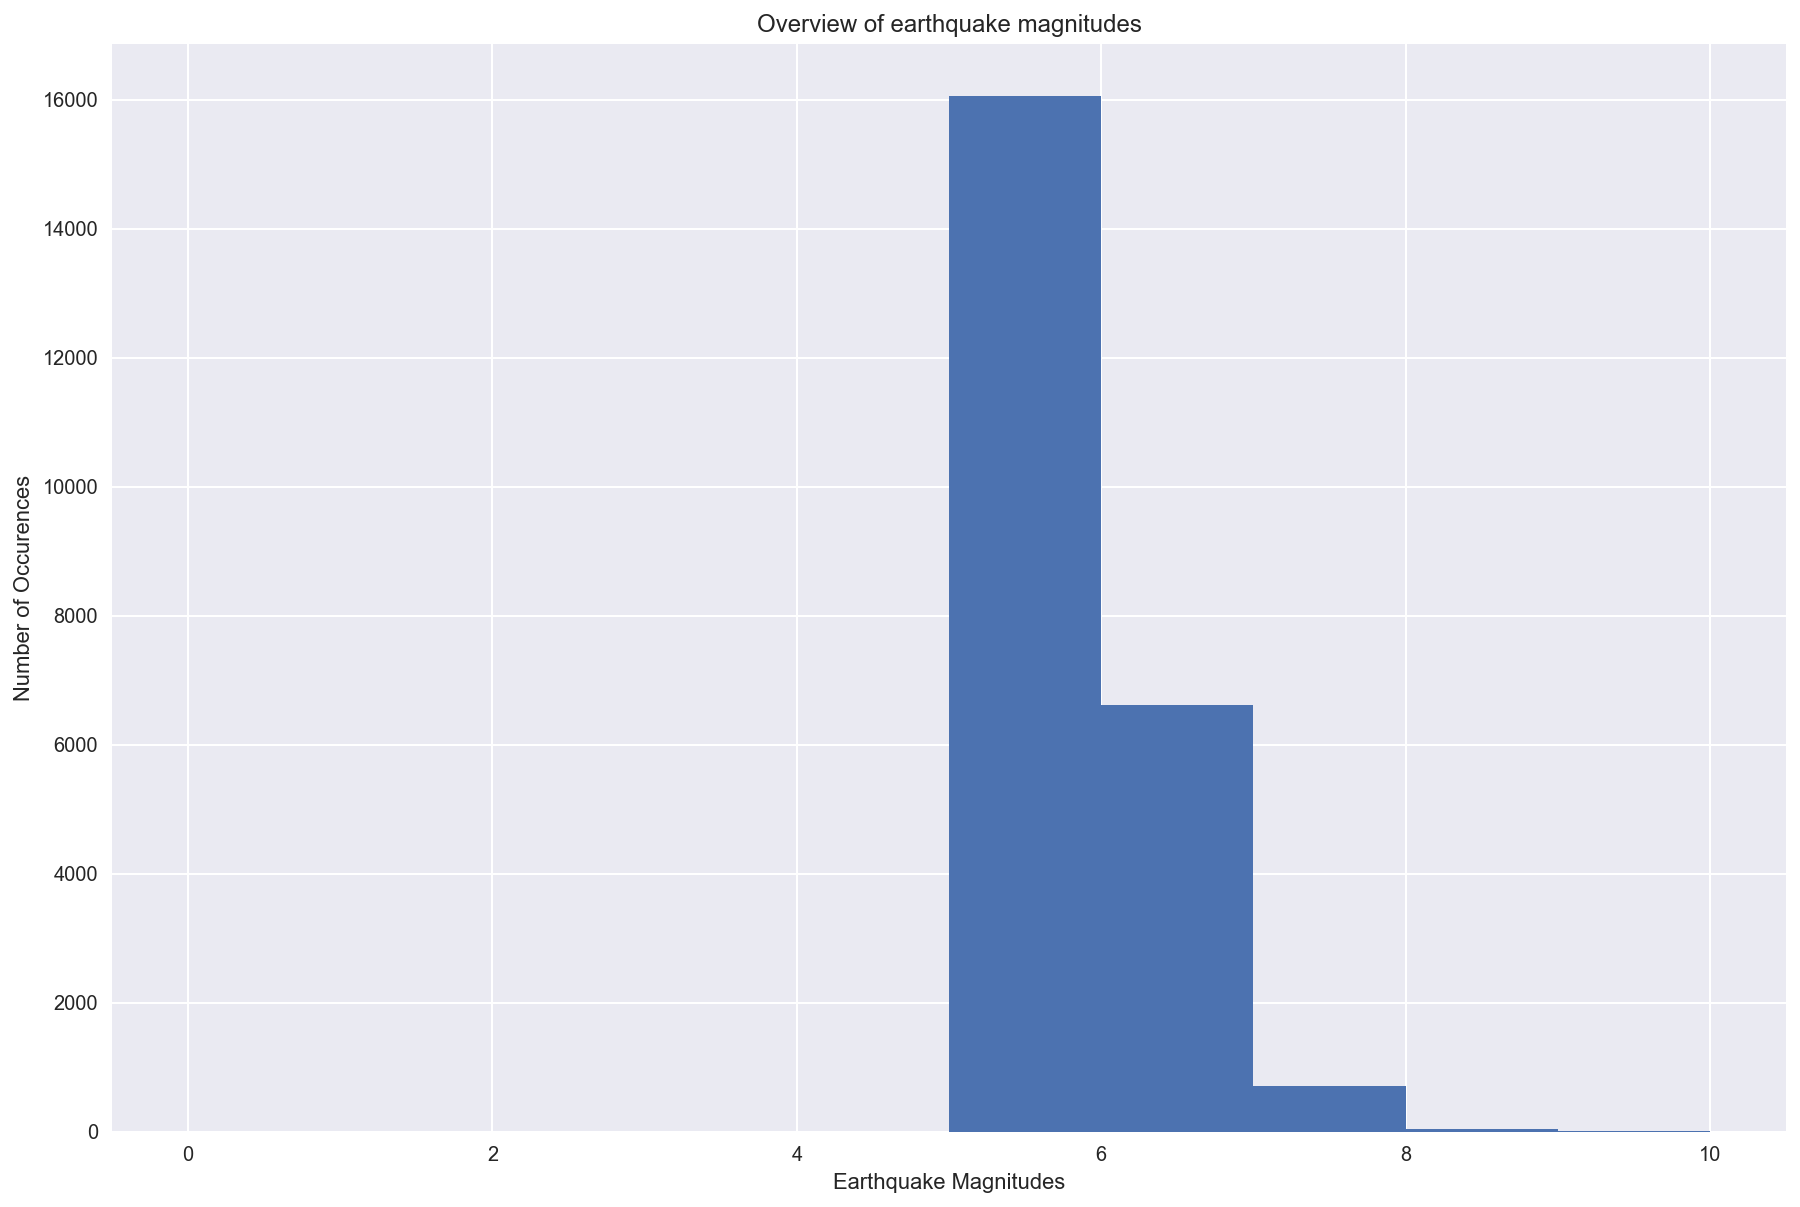

In [187]:
fig = plt.figure(figsize=(15, 10))
(n,bins, patches) = plt.hist(earth["Magnitude"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")
print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

- Over 16,000 (68.5%) earthquakes magnitude were between 5 and 6
- Over 40 (0.17%) earthquakes magitude were greater than 8.

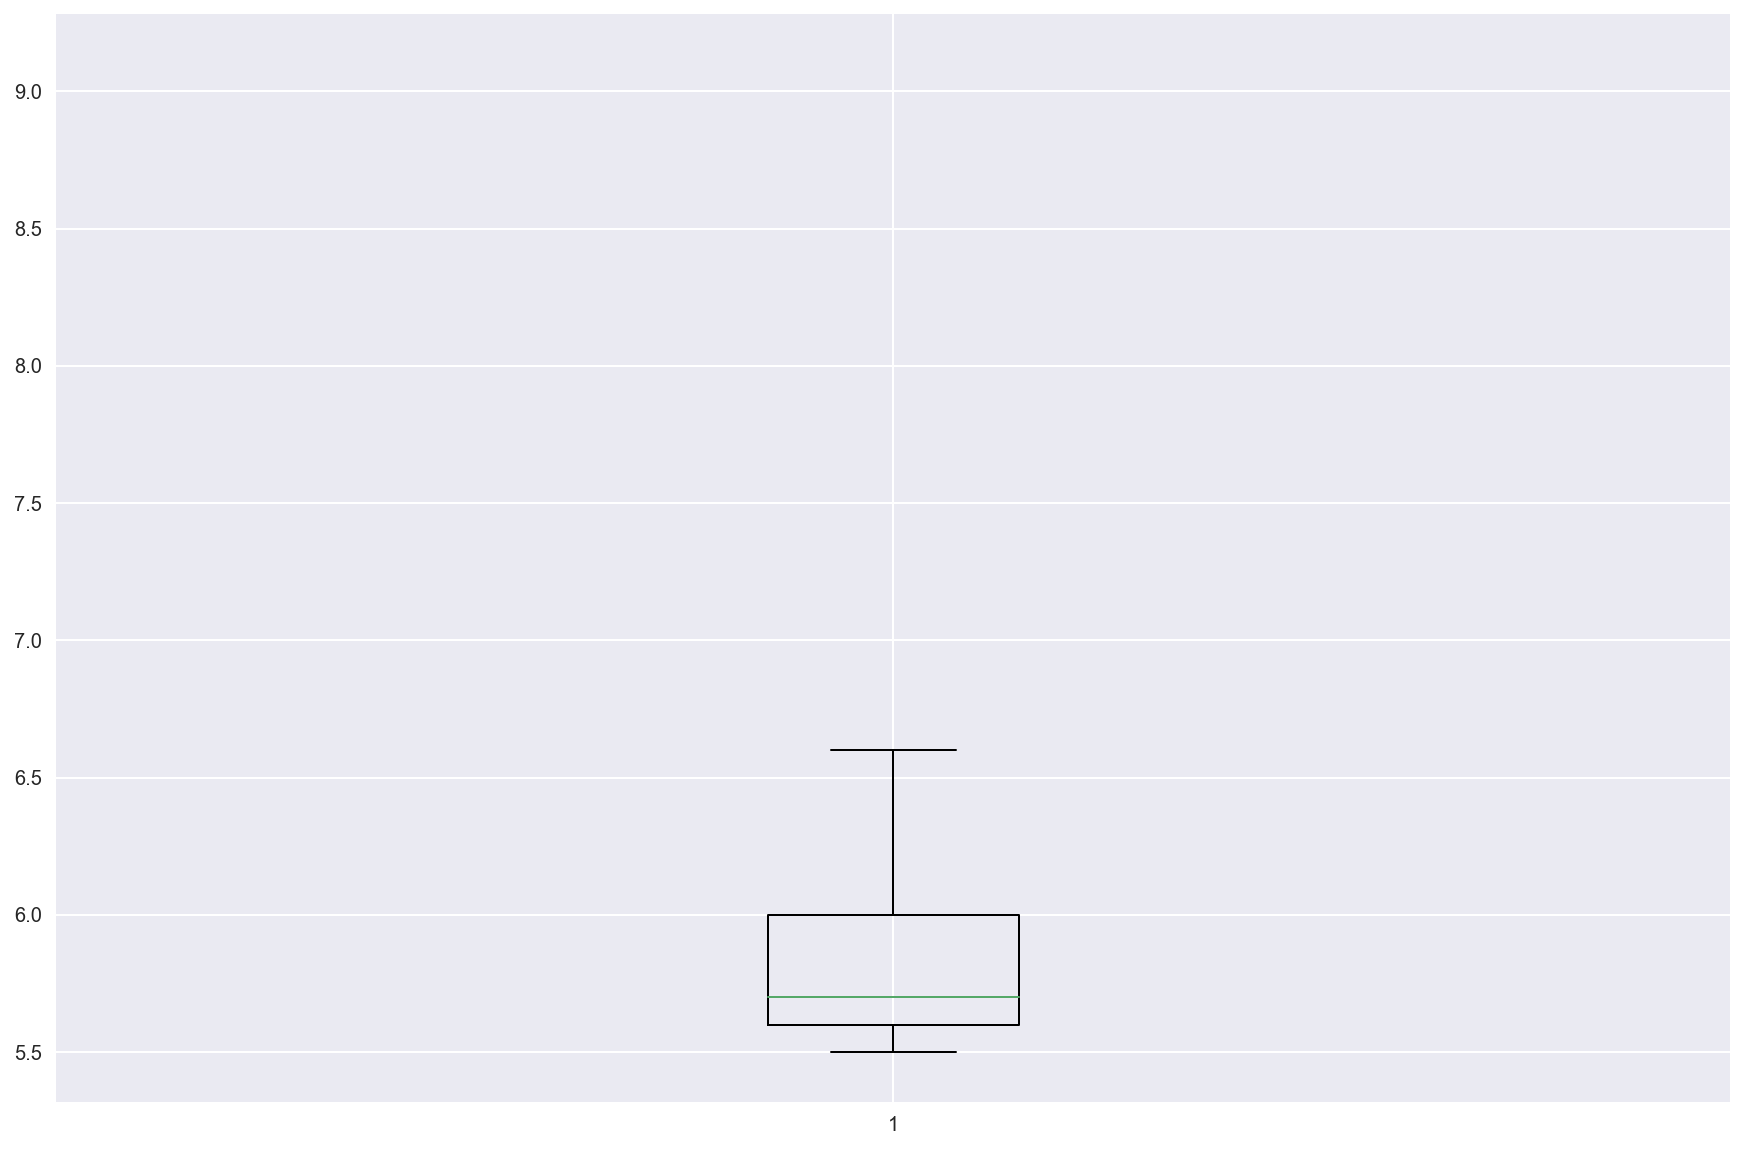

In [175]:
fig=fig = plt.figure(figsize=(15, 10))
plt.boxplot(earth["Magnitude"])
plt.show()

In [47]:
highly_affected = earth[earth["Magnitude"]>=8]

In [48]:
print(highly_affected.shape)

(40, 6)


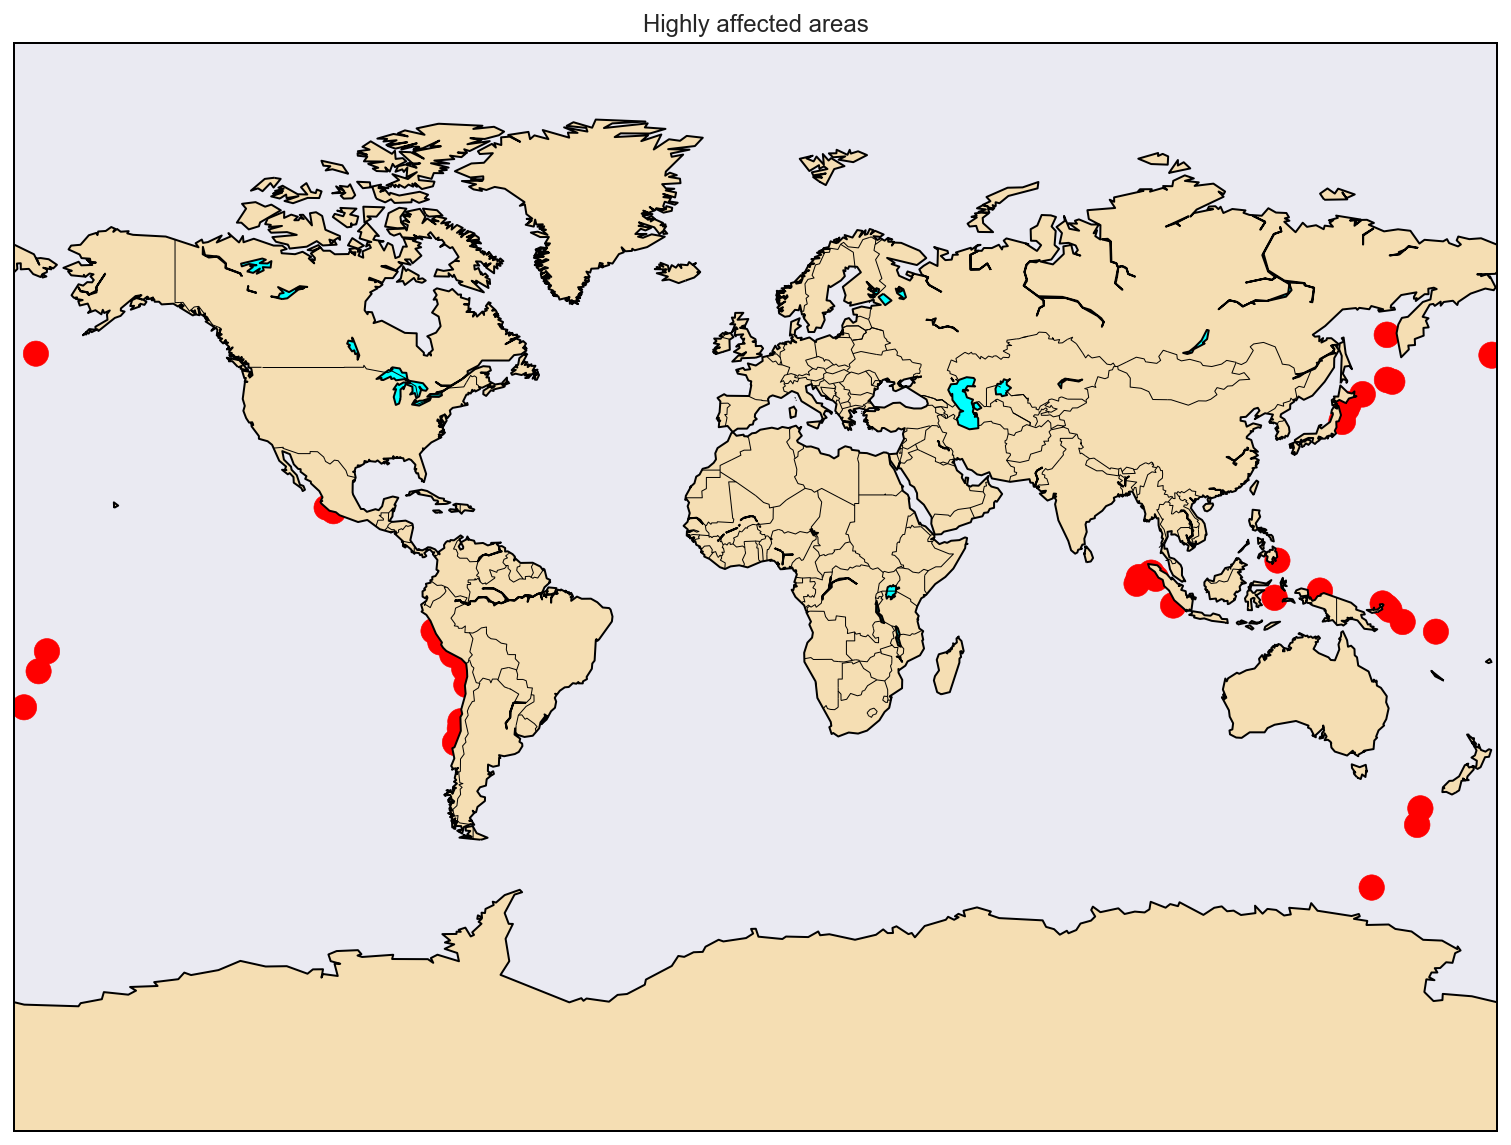

In [54]:
longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection="mill")
a,b = n(longitudes,latitudes)

fig2 = plt.figure(2, figsize= (18,10))
plt.title("Highly affected areas")
n.scatter(a,b,  c = "red", s = highly_affected["Magnitude"] *20)
n.drawcoastlines()
n.fillcontinents(color='wheat',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()
fig2.show()

## Frequency by Month ##

In [178]:
earth["Month"] = earth['Date'].dt.month

In [20]:
#month_occurrence = earth.pivot_table(index = "Month", values = ["Magnitude"] , aggfunc = )

month_occurrence = earth.groupby("Month").groups
print(len(month_occurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

for i in range(len(month)):
    val = month_occurrence[month[i]]
    occurrence.append(len(val))

print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


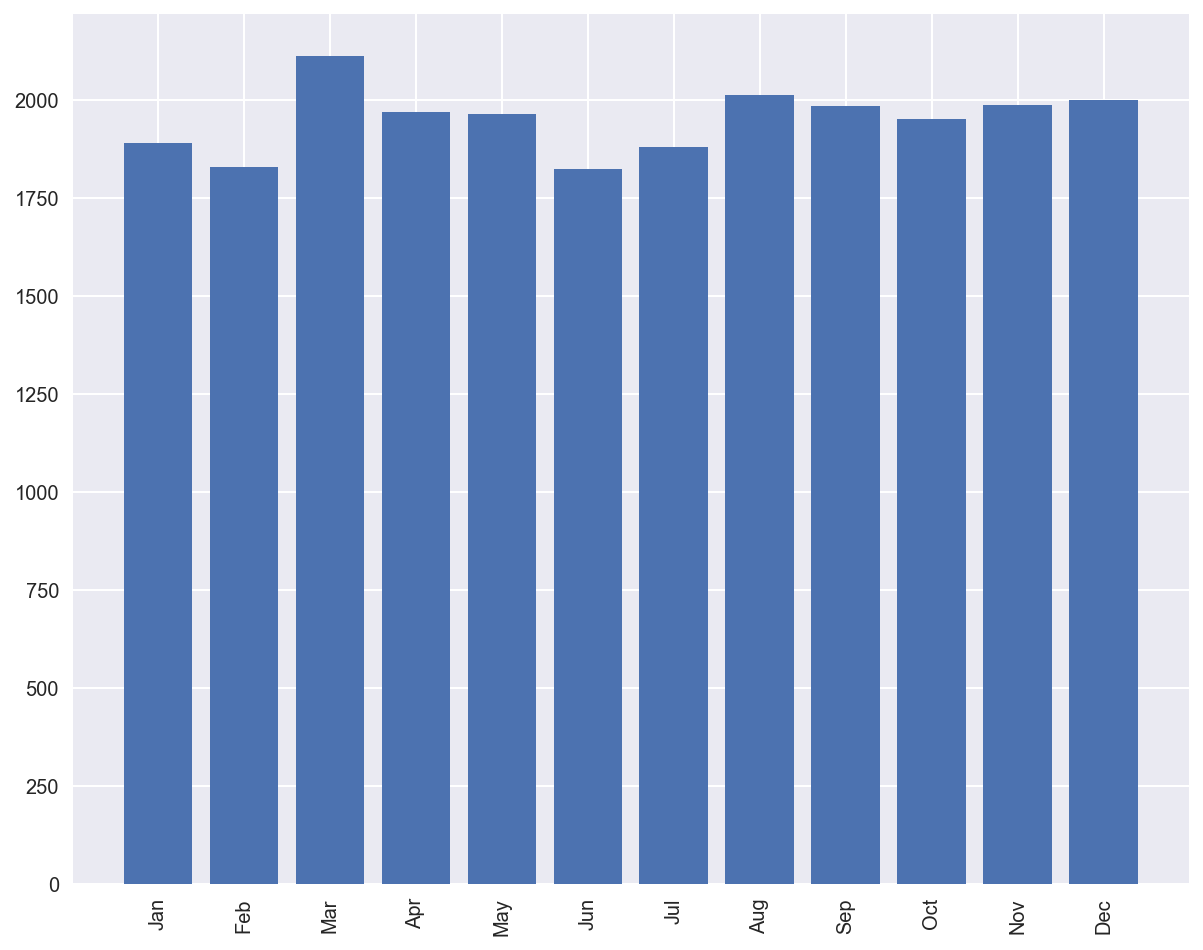

In [21]:
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 1

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months
bar_heights = occurrence

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
plt.show()

- Highly affected month : March
- Least affected month : June

## Frequency by Year ##

In [22]:
earth["Year"] = earth['Date'].dt.year

('Maximum', 713)
('Minimum', 234)


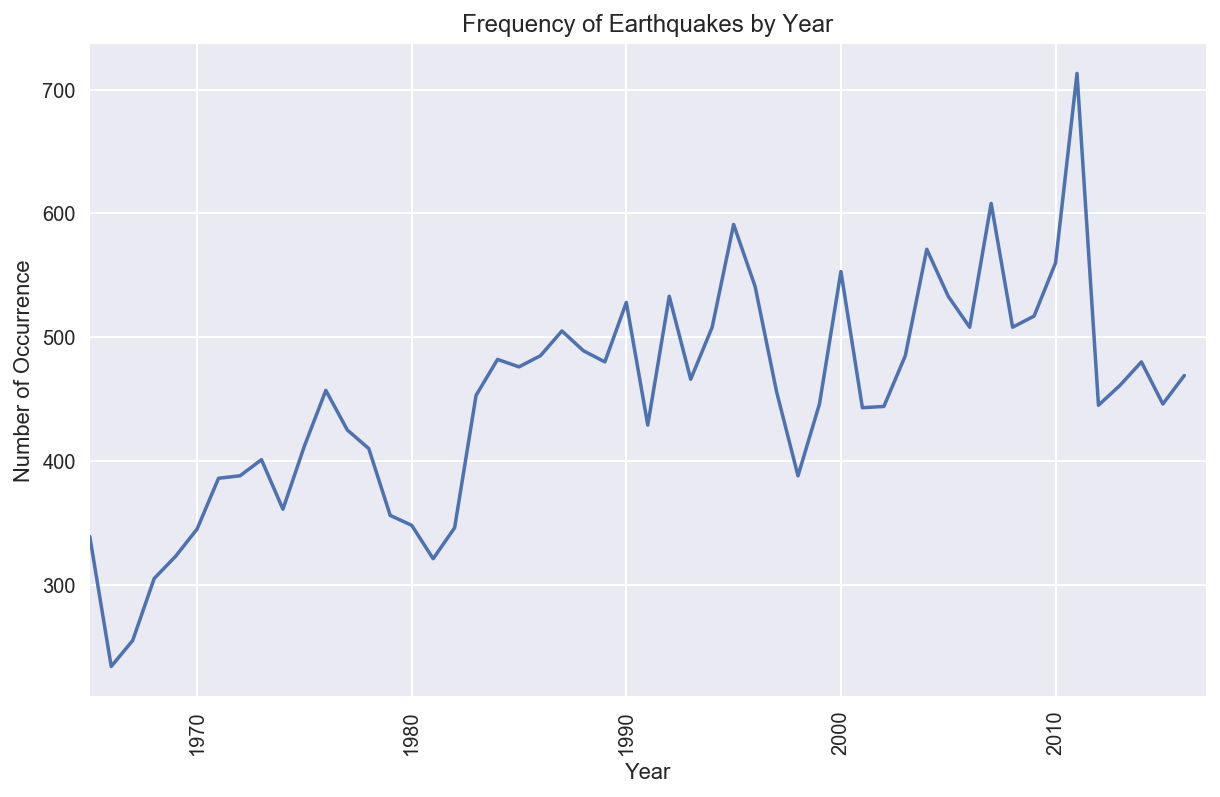

In [23]:
year_occurrence = earth.groupby("Year").groups


year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = year_occurrence[year[i]]
    occurrence.append(len(val))

maximum = max(occurrence)
minimum = min(occurrence)
print("Maximum",maximum)
print("Minimum",minimum)

#print("Year :" + "     " +"Occurrence")

#for k,v in year_occurrence.items():
    #print(str(k) +"      "+ str(len(v)))

fig = plt.figure(figsize=(10,6))
plt.plot(year,occurrence)
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Frequency of Earthquakes by Year")
plt.xlim(1965,2017)
plt.show()

- Least affected year : 1966
- Highly affected year : 2011

In [126]:
earthquake1 = pd.read_csv('C:/Users/pande/Desktop/database.csv', sep=',', header=0)

(0, {'llcrnrlon': 55.02455, 'urcrnrlon': 98.79408, 'llcrnrlat': 2.92498, 'urcrnrlat': 41.33024, 'label': 'India and neighbours'})
(1, {'llcrnrlon': 18.01758, 'urcrnrlon': 29.17969, 'llcrnrlat': 33.62262, 'urcrnrlat': 42.33317, 'label': 'Greece'})
(2, {'llcrnrlon': 127.79297, 'urcrnrlon': 151.08398, 'llcrnrlat': 29.65822, 'urcrnrlat': 46.41419, 'label': 'Japan'})
(3, {'llcrnrlon': 92.02148, 'urcrnrlon': 130.51758, 'llcrnrlat': -11.90095, 'urcrnrlat': 19.02967, 'label': 'South-east Asia'})


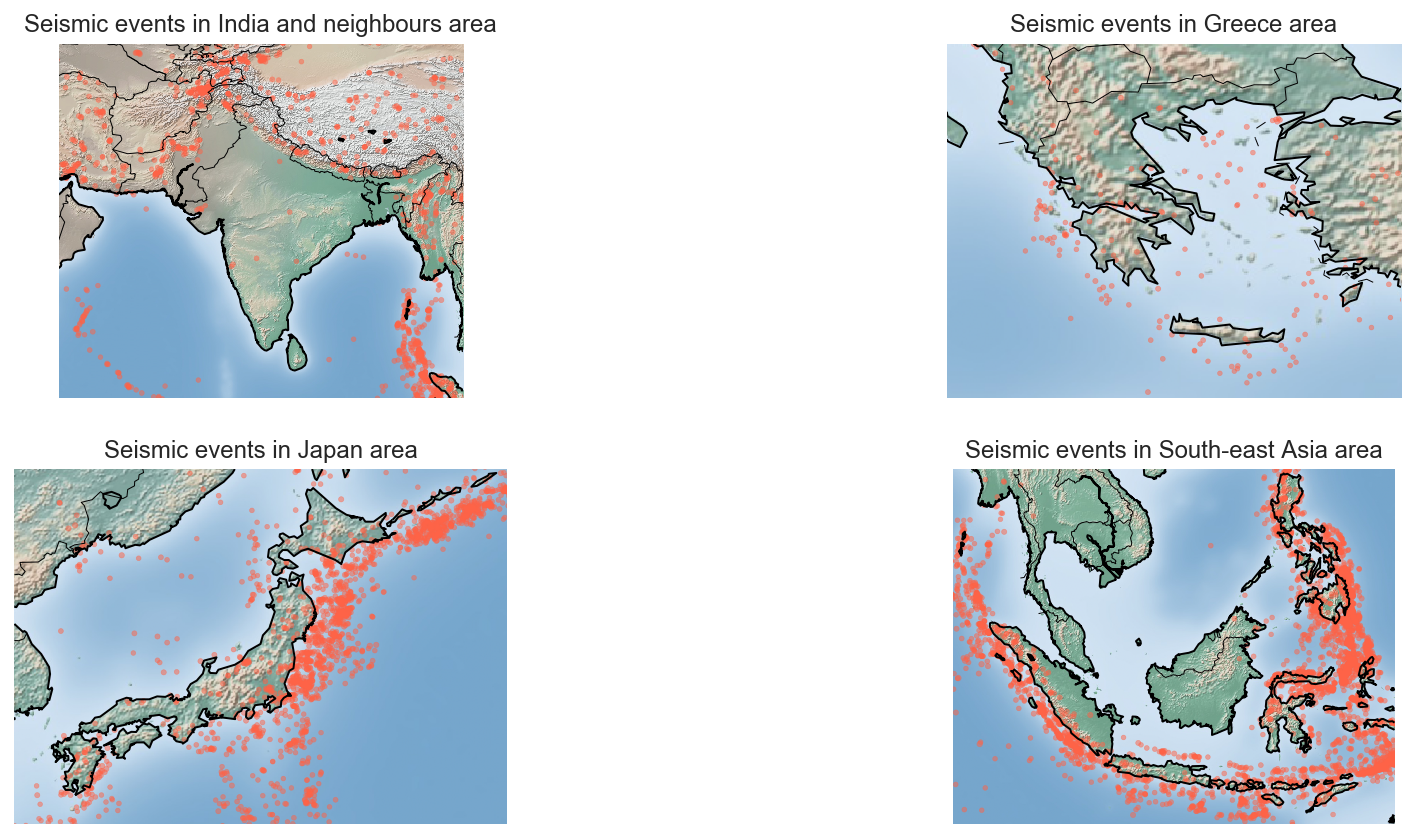

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
#import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

areas = [
    { 'label': 'India and neighbours',
      'llcrnrlat': 2.92498,
      'llcrnrlon': 55.02455,
      'urcrnrlat': 41.33024,
      'urcrnrlon': 98.79408},
    { 'label': 'Greece',
      'llcrnrlat': 33.62262,
      'llcrnrlon': 18.01758,
      'urcrnrlat': 42.33317,
      'urcrnrlon': 29.17969},
    { 'label': 'Japan',
      'llcrnrlat': 29.65822,
      'llcrnrlon': 127.79297,
      'urcrnrlat': 46.41419,
      'urcrnrlon': 151.08398},
    { 'label': 'South-east Asia',
      'llcrnrlat': -11.90095,
      'llcrnrlon': 92.02148,
      'urcrnrlat': 19.02967,
      'urcrnrlon': 130.51758},
]

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for i, a in enumerate(areas):
    print(i, a)
    ax = fig.add_subplot(100*len(areas) + 20 + i+1)
    m = Basemap(projection='cyl',
                llcrnrlat=a['llcrnrlat'],
                llcrnrlon=a['llcrnrlon'],
                urcrnrlat=a['urcrnrlat'],
                urcrnrlon=a['urcrnrlon'],
                resolution='l')
    m.drawcountries()
    m.drawcoastlines()
    m.shadedrelief()

    m.scatter(earthquake1['Longitude'].values
              ,earthquake1['Latitude'].values
              ,s=earthquake1['Magnitude'].values*1
              ,c="tomato"
              ,marker="o"
              ,cmap=cm.seismic
              ,alpha=.5)

    plt.title("Seismic events in %s area" % a['label'])
#plt.tight_layout()

plt.show()